<a href="https://colab.research.google.com/github/Modinat-A/CE888/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
df['y'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
#How many samples and features are there?

num_of_samples = len(df.index)
num_of_features = len(df.columns)
print('number of samples:', num_of_samples , 'number of features:', num_of_features )

number of samples: 178 number of features: 14


In [9]:
# Quiz Q1
# How many instances are there for each class? 
df['y'].value_counts()

1    71
0    59
2    48
Name: y, dtype: int64

In [10]:
# Calculate the means, medians, and standard deviations of each feature
df.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
y                                 0.938202
dtype: float64

In [11]:
df.median()

alcohol                          13.050
malic_acid                        1.865
ash                               2.360
alcalinity_of_ash                19.500
magnesium                        98.000
total_phenols                     2.355
flavanoids                        2.135
nonflavanoid_phenols              0.340
proanthocyanins                   1.555
color_intensity                   4.690
hue                               0.965
od280/od315_of_diluted_wines      2.780
proline                         673.500
y                                 1.000
dtype: float64

In [12]:
df.std()

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
y                                 0.775035
dtype: float64

In [18]:
df_wth_label = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue','proline',
       'od280/od315_of_diluted_wines']]

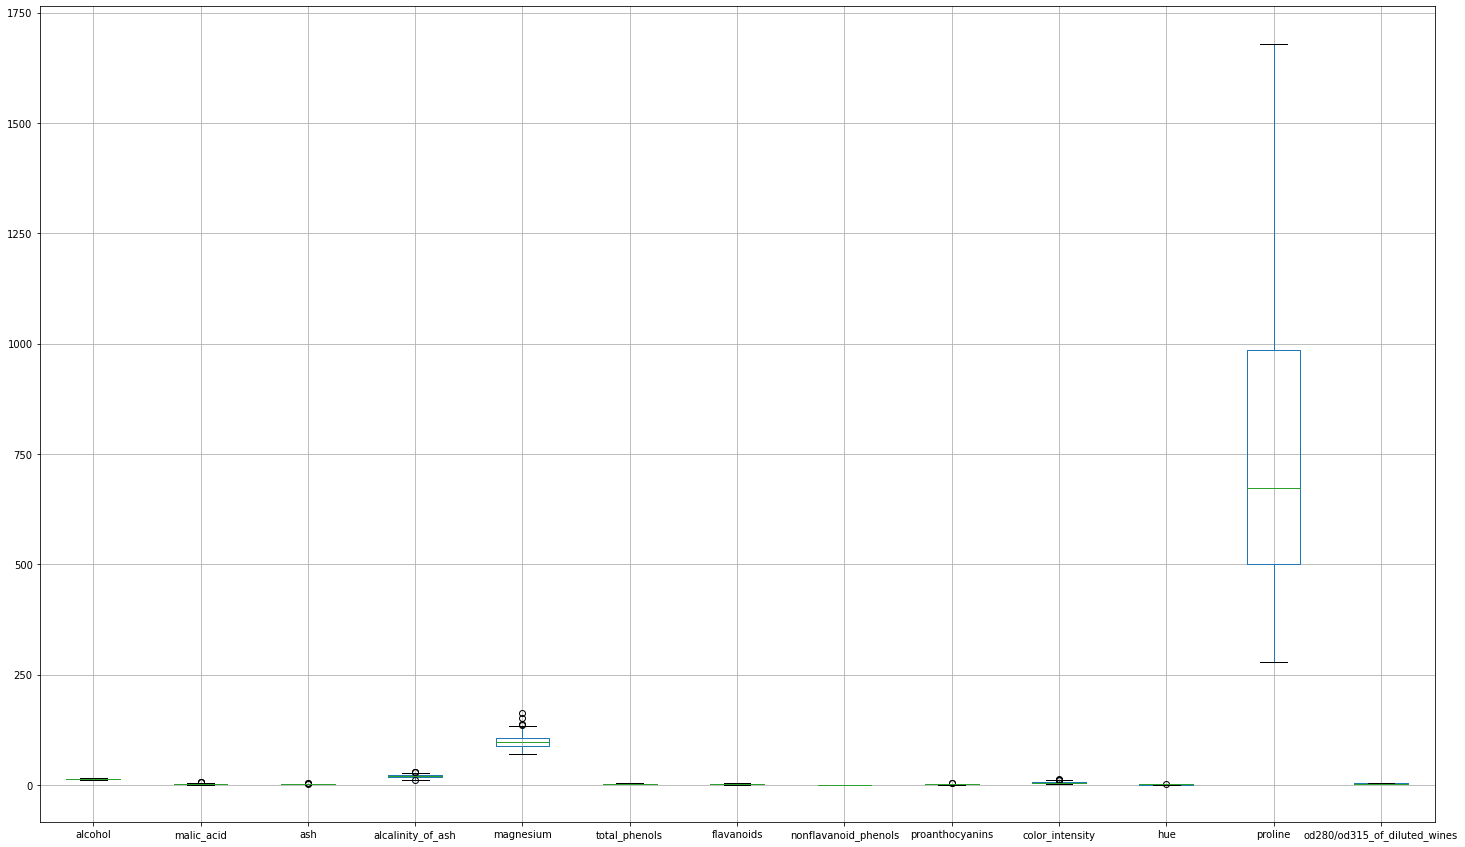

In [20]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

boxplot = df_wth_label.boxplot(figsize=(25,15))  

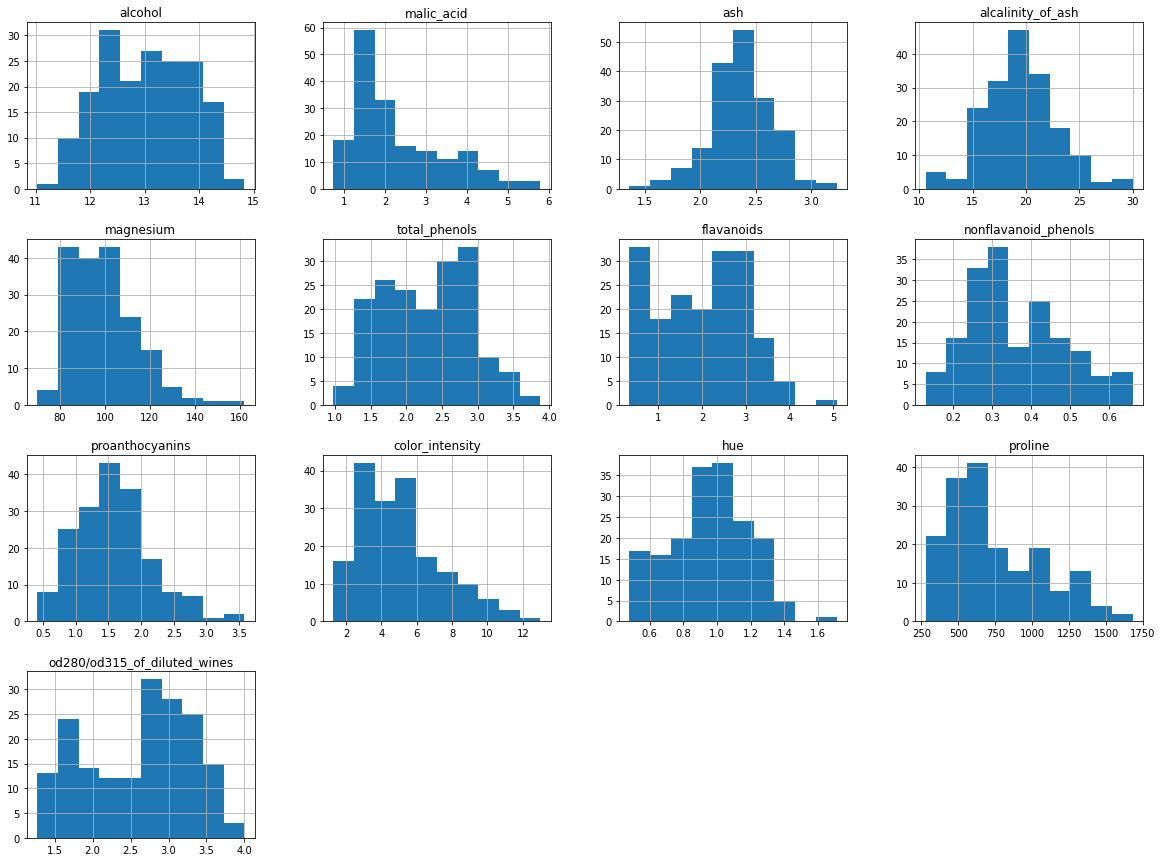

In [21]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features
hist1 = pd.DataFrame.hist(df_wth_label,figsize=(20,15))

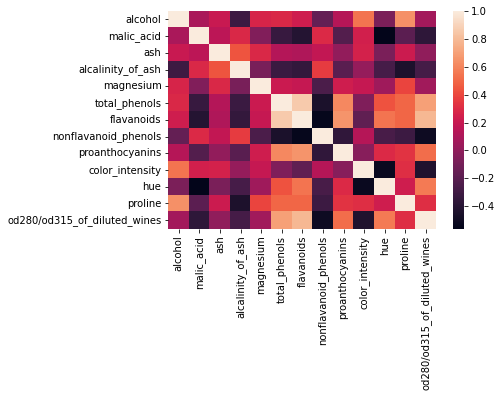

In [22]:
# Calculate the correlations between each pair of variables
coor = df_wth_label.corr()

# plot the heatmap
sns.heatmap(coor, 
        xticklabels=coor.columns,
        yticklabels=coor.columns)


In [23]:
# What is the highest correlation between features?
s = coor.unstack()
so = s.sort_values(kind="quicksort")
print(so)

hue                           malic_acid                     -0.561296
malic_acid                    hue                            -0.561296
flavanoids                    nonflavanoid_phenols           -0.537900
nonflavanoid_phenols          flavanoids                     -0.537900
hue                           color_intensity                -0.521813
                                                                ...   
alcalinity_of_ash             alcalinity_of_ash               1.000000
ash                           ash                             1.000000
malic_acid                    malic_acid                      1.000000
proline                       proline                         1.000000
od280/od315_of_diluted_wines  od280/od315_of_diluted_wines    1.000000
Length: 169, dtype: float64


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

def std_pca(df,variance=0.5):
      y = df[['y']]
      x = df.loc[:, df.columns!='y'].values
      x_transformed= StandardScaler().fit_transform(x)
      pca = PCA(n_components=0.5,random_state=100)
      pcomp = pca.fit_transform(x_transformed)
      print(np.cumsum(pca.explained_variance_ratio_))
      df= pd.DataFrame(data= pcomp, columns=['principalcomponent1','principalcomponent2'])
      fdf = pd.concat([df,y],axis =1)
      return fdf.values



In [63]:
std_pca(df)

[0.36198848 0.55406338]


array([[ 3.31675081, -1.44346263,  0.        ],
       [ 2.20946492,  0.33339289,  0.        ],
       [ 2.51674015, -1.0311513 ,  0.        ],
       [ 3.75706561, -2.75637191,  0.        ],
       [ 1.00890849, -0.86983082,  0.        ],
       [ 3.05025392, -2.12240111,  0.        ],
       [ 2.44908967, -1.17485013,  0.        ],
       [ 2.05943687, -1.60896307,  0.        ],
       [ 2.5108743 , -0.91807096,  0.        ],
       [ 2.75362819, -0.78943767,  0.        ],
       [ 3.47973668, -1.30233324,  0.        ],
       [ 1.7547529 , -0.61197723,  0.        ],
       [ 2.11346234, -0.67570634,  0.        ],
       [ 3.45815682, -1.13062988,  0.        ],
       [ 4.31278391, -2.09597558,  0.        ],
       [ 2.3051882 , -1.66255173,  0.        ],
       [ 2.17195527, -2.32730534,  0.        ],
       [ 1.89897118, -1.63136888,  0.        ],
       [ 3.54198508, -2.51834367,  0.        ],
       [ 2.0845222 , -1.06113799,  0.        ],
       [ 3.12440254, -0.78689711,  0.   

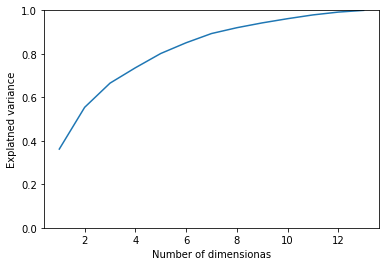

In [62]:
pca_n= PCA()
x =df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue','proline',
       'od280/od315_of_diluted_wines']]
x_transformed= StandardScaler().fit_transform(x)
s_pca= pca_n.fit_transform(x_transformed)
c = np.cumsum(pca_n.explained_variance_ratio_)
plt.plot (range (1,len(c)+ 1), c)
plt.xlabel("Number of dimensionas")
plt.ylabel ("Explatned variance")
plt.ylim(0,1)
plt.savefig('students pcs variance.pdf', dpi=300)
plt.show()
